In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/takahiromatsunaga/res2023/bledata/assignment/validation_result23012917.csv')
df.head(10)

,foldout,nonquant-oneway,nonquant-em,quant-oneway,quant-em
0,1,0.000390,0.006226,0.890683,0.920900
1,2,0.302433,0.515585,0.749844,0.789794
2,3,0.355640,-0.066017,0.919150,0.946962
3,4,-0.165355,0.438895,0.790043,0.831394
4,5,0.253561,0.218412,0.931222,0.955528
5,6,0.112629,0.107208,0.888756,0.952436
6,7,0.625369,0.364494,0.858146,0.944604
7,8,-0.013022,0.127928,0.861338,0.896726
8,9,0.255176,0.256811,0.856060,0.900049
9,10,0.031379,0.469502,0.892502,0.917377


In [3]:
df = df.copy() 
# df['nonquant_oneway'] = 0
# df['nonquant_em'] = 0
# df['quant_oneway'] = 0
# df['quant_em'] = 0

for i in range(1, len(df)):
    df.loc[i, 'non-quant-oneway'] = df['nonquant-oneway'][:i+1].mean() #pd.sum(df['nonquant_oneway']) / i
    df.loc[i, 'nonquant-em'] = df['nonquant-em'][:i+1].mean() #pd.sum(df['nonquant_em']) / i
    df.loc[i, 'quant-oneway'] = df['quant-oneway'][:i+1].mean() #pd.sum(df['quant_oneway']) / i
    df.loc[i, 'quant-em'] = df['quant-em'][:i+1].mean() #pd.sum(df['quant_em']) / i

print(df)

   foldout  nonquant-oneway  nonquant-em  quant-oneway  quant-em  \
0        1         0.000390     0.006226      0.890683  0.920900   
1        2         0.302433     0.260906      0.820263  0.855347   
2        3         0.355640     0.067038      0.876699  0.907736   
3        4        -0.165355     0.193266      0.844422  0.878844   
4        5         0.253561     0.149170      0.872658  0.903671   
5        6         0.112629     0.130636      0.865580  0.903156   
6        7         0.625369     0.167391      0.861207  0.902037   
7        8        -0.013022     0.137820      0.861606  0.896052   
8        9         0.255176     0.152140      0.861020  0.896421   
9       10         0.031379     0.173410      0.864664  0.898154   

   non-quant-oneway  
0               NaN  
1          0.151411  
2          0.219488  
3          0.123277  
4          0.149334  
5          0.143217  
6          0.212096  
7          0.183956  
8          0.191869  
9          0.175820  


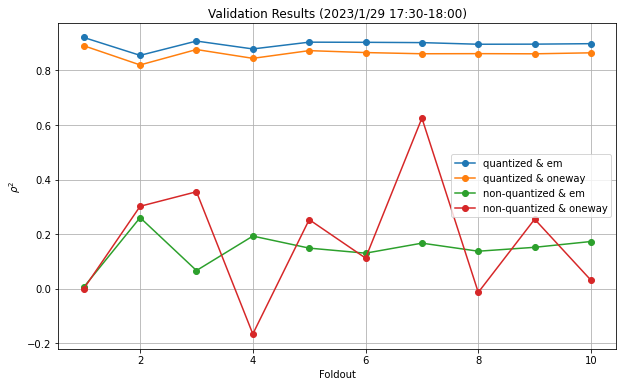

In [6]:
import matplotlib.pyplot as plt

# データフレームから各列のデータを抽出
foldout = df['foldout']

quant_em = df['quant-em']
quant_oneway = df['quant-oneway']
nonquant_em = df['nonquant-em']
nonquant_oneway = df['nonquant-oneway']

# 折れ線グラフを描画
plt.figure(figsize=(10, 6))
plt.plot(foldout, quant_em, marker='o', label='quantized & em')
plt.plot(foldout, quant_oneway, marker='o', label='quantized & oneway')
plt.plot(foldout, nonquant_em, marker='o', label='non-quantized & em')
plt.plot(foldout, nonquant_oneway, marker='o', label='non-quantized & oneway')

# グラフのタイトルと軸ラベルを設定
plt.title('Validation Results (2023/1/29 17:30-18:00)')
plt.xlabel('Foldout')
plt.ylabel(r'$\rho^2$')

# 凡例を追加
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()
